## Métricas de Error

#### Análisis Dataset

Librerías

In [17]:
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [18]:
# Importar el dataset
df = pd.read_csv('Nasdaq.csv')

df.head(5)

,Date,Close/Last,Volume,Open,High,Low
0,12/02/2022,$105.05,7916878,$102.02,$105.54,$101.82
1,12/01/2022,$103.37,7452313,$102.33,$103.56,$101.95
2,11/30/2022,$102.2,15000770,$99.05,$102.56,$98.52
3,11/29/2022,$98.66,4423921,$98.96,$99.33,$98.2
4,11/28/2022,$98.66,5257862,$98.99,$100.16,$98.56


Revisar el tipo de datos del dataframe para evitar errores futuros

In [19]:
df.dtypes

Date          object
Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object

Convertir los datos a flotantes

In [20]:
# Primero remover los símbolos '$'
df = df.replace({'\$':''}, regex=True)
# Convertir a float
for col in df.columns[1:]:
    df[col] = df[col].astype(float)
    
df.head(5)

,Date,Close/Last,Volume,Open,High,Low
0,12/02/2022,105.05,7916878.0,102.02,105.54,101.82
1,12/01/2022,103.37,7452313.0,102.33,103.56,101.95
2,11/30/2022,102.20,15000770.0,99.05,102.56,98.52
3,11/29/2022,98.66,4423921.0,98.96,99.33,98.20
4,11/28/2022,98.66,5257862.0,98.99,100.16,98.56


Revisar número de instancias, atributos y datos faltantes

In [21]:
# Número de instancias
instancias = df.shape[0]
atributos = df.shape[1]

print('Número de instancias: ', instancias)
print('Número de atributos: ', atributos)
# Hay datos faltantes?
df.isnull().sum()

Número de instancias:  126
Número de atributos:  6


Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

Por último graficar las distribuciones con gráficos de caja de cada columna.

In [22]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Distribucions con boxplot de cada atributo
fig = make_subplots(rows=3, cols=2, subplot_titles=df.columns[1:])

for i, col in enumerate(df.columns[1:]):
    fig.add_trace(go.Box(y=df[col], name=col), row=(i//2)+1, col=(i%2)+1)
    
fig.update_layout(height=800, width=800, title_text="Distribuciones de los atributos")

#### Funciones que se usarán

Función de Regresión Polinomial

In [23]:
def RegresionPolinomial(columna1, columna2, grado):
    # Convertir los datos de entrada en matrices numpy
    X = np.array(columna1).reshape(-1, 1)
    y = np.array(columna2).reshape(-1, 1)

    # Transformar los datos de entrada con PolynomialFeatures
    poly = PolynomialFeatures(grado)
    X_poly = poly.fit_transform(X)

    # Ajustar el modelo de regresión lineal a los datos transformados
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)
    
    # Ajustar el polinomio a los datos    
    x_pred = poly.transform(X)

    # Calcular los valores ajustados de y para graficar la línea ajustada
    y_pred = lin_reg.predict(x_pred)

    # Devolver los valores de X e y ajustados para graficar la línea ajustada
    return X, y_pred


Funciones de Pérdida para datos continuos

In [24]:
# Error cuadrático medio
def MSE(y_true, y_pred):
    n = len(y_true)
    mse = sum((y_true[i] - y_pred[i])**2 for i in range(n)) / n
    return mse[0]

# RMSE
def RMSE(y_true, y_pred):
    n = len(y_true)
    mse = sum((y_true[i] - y_pred[i])**2 for i in range(n)) / n
    rmse = mse ** 0.5
    return rmse[0]

# Error absoluto medio
def MAE(y_true, y_pred):
    n = len(y_true)
    mae = sum(abs(y_true[i] - y_pred[i]) for i in range(n)) / n
    return mae[0]

# Error relativo absoluto
def RAE(y_true, y_pred):
    n = len(y_true)
    avg = sum(y_true) / n
    rae = sum(abs(y_true[i] - y_pred[i]) / abs(avg - y_true[i]) for i in range(n)) / n
    return rae[0]

# Error relativo cuadrático
def RSE(y_true, y_pred):
    n = len(y_true)
    avg = sum(y_true) / n
    rse = sum((y_true[i] - y_pred[i])**2 / (y_true[i] - avg)**2 for i in range(n)) / n
    return rse[0]

# Coeficiente de determinación
def R2(y_true, y_pred):
    n = len(y_true)
    avg = sum(y_true) / n
    sst = sum((y_true[i] - avg)**2 for i in range(n))
    sse = sum((y_true[i] - y_pred[i])**2 for i in range(n))
    r2 = 1 - sse/sst
    return r2[0]

# Coeficiente de correlación
def CC(y_true, y_pred):
    n = len(y_true)
    avg_true = sum(y_true) / n
    avg_pred = sum(y_pred) / n
    std_true = (sum((y_true[i] - avg_true)**2 for i in range(n)) / n)**0.5
    std_pred = (sum((y_pred[i] - avg_pred)**2 for i in range(n)) / n)**0.5
    covariance = sum((y_true[i] - avg_true) * (y_pred[i] - avg_pred) for i in range(n)) / n
    cc = covariance / (std_true * std_pred)
    return cc[0]

# Función para calcular todas las métricas al mismo tiempo
def AllMetrics(y_true, y_pred):
    mse = MSE(y_true, y_pred)
    rmse = RMSE(y_true, y_pred)
    mae = MAE(y_true, y_pred)
    rae = RAE(y_true, y_pred)
    rse = RSE(y_true, y_pred)
    r2 = R2(y_true, y_pred)
    cc = CC(y_true, y_pred)
    
    return (mse, rmse, mae, rae, rse, r2, cc)

#### Regresión y Métricas
Se hará regresiones de grado 1 a 3, comparando el atributo 'Close/Last' con los demás atributos y se calcularan las métricas de error para cada regresión.

Regresiones de Primer Grado

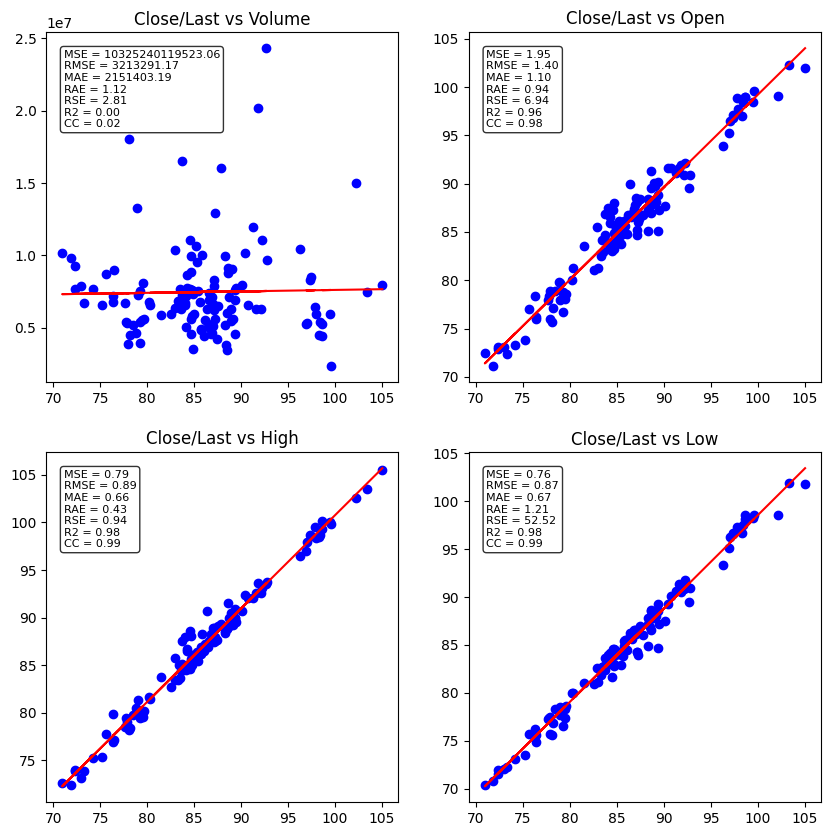

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Diccionario para guardar los valores de error
dic_primer_grado = collections.defaultdict(lambda: collections.defaultdict(float))

# Aplicar la función de regresión comparando el volumen con todos los demás atributos y mostrar los errores
for i, col in enumerate(df.columns[2:]):
    # Regresión
    X, y_ajuste = RegresionPolinomial(df['Close/Last'], df[col], 1)
    # Cálculo de errores
    y_true = np.array(df[col]).reshape(-1, 1)
    mse, rmse, mae, rae, rse, r2, cc = AllMetrics(y_true, y_ajuste)
    
    # Agregar resultados al diccionario
    dic_primer_grado[col]['mse'] = mse
    dic_primer_grado[col]['rmse'] = rmse
    dic_primer_grado[col]['mae'] = mae
    dic_primer_grado[col]['rae'] = rae
    dic_primer_grado[col]['rse'] = rse
    dic_primer_grado[col]['r2'] = r2
    dic_primer_grado[col]['cc'] = cc
    
    # Gráfica
    ax = axs[i//2, i%2]
    ax.scatter(df['Close/Last'], df[col], color='blue')
    ax.plot(X, y_ajuste, color='red')
    ax.set_title(f'Close/Last vs {col}')
    # Agregar el valor del error como texto en la gráfica correspondiente
    ax.text(0.05, 0.95, f'MSE = {mse:.2f}\nRMSE = {rmse:.2f}\nMAE = {mae:.2f}\nRAE = {rae:.2f}\nRSE = {rse:.2f}\nR2 = {r2:.2f}\nCC = {cc:.2f}',
            transform=ax.transAxes, fontsize=8, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))


Regresiones de Segundo Grado

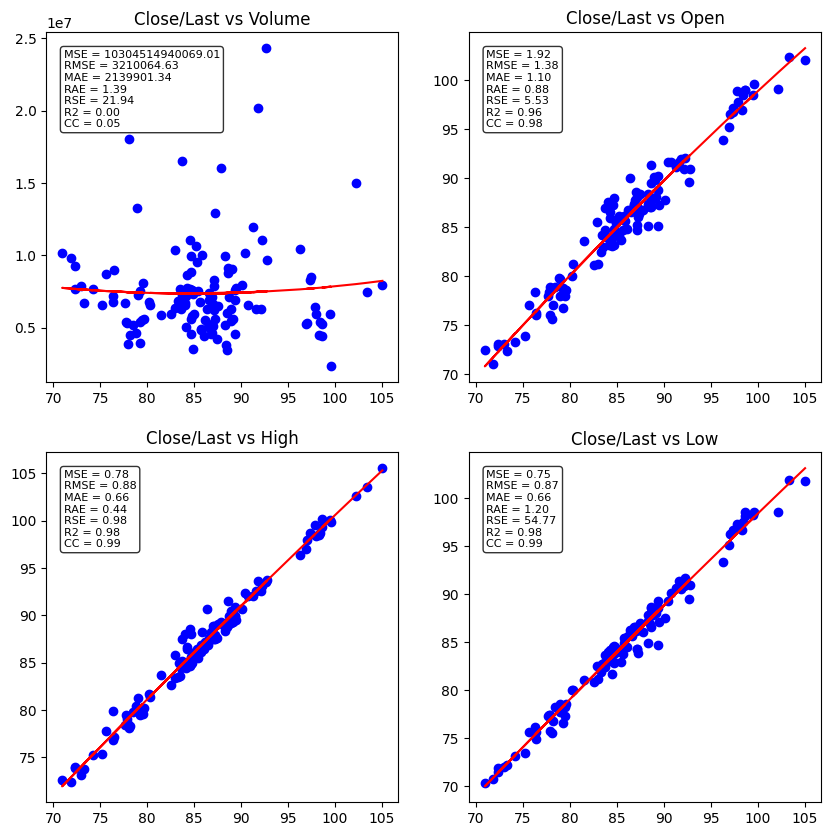

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

dic_segundo_grado = collections.defaultdict(lambda: collections.defaultdict(float))

# Aplicar la función de regresión comparando el volumen con todos los demás atributos y mostrar los errores
for i, col in enumerate(df.columns[2:]):
    # Regresión
    X, y_ajuste = RegresionPolinomial(df['Close/Last'], df[col], 2)
    # Cálculo de errores
    y_true = np.array(df[col]).reshape(-1, 1)
    mse, rmse, mae, rae, rse, r2, cc = AllMetrics(y_true, y_ajuste)
    
    # Agregar resultados al diccionario
    dic_segundo_grado[col]['mse'] = mse
    dic_segundo_grado[col]['rmse'] = rmse
    dic_segundo_grado[col]['mae'] = mae
    dic_segundo_grado[col]['rae'] = rae
    dic_segundo_grado[col]['rse'] = rse
    dic_segundo_grado[col]['r2'] = r2
    dic_segundo_grado[col]['cc'] = cc
    
    # Gráfica
    ax = axs[i//2, i%2]
    ax.scatter(df['Close/Last'], df[col], color='blue')
    ax.plot(X, y_ajuste, color='red')
    ax.set_title(f'Close/Last vs {col}')
    # Agregar el valor del error como texto en la gráfica correspondiente
    ax.text(0.05, 0.95, f'MSE = {mse:.2f}\nRMSE = {rmse:.2f}\nMAE = {mae:.2f}\nRAE = {rae:.2f}\nRSE = {rse:.2f}\nR2 = {r2:.2f}\nCC = {cc:.2f}',
            transform=ax.transAxes, fontsize=8, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

Regresiones de Tercer Grado

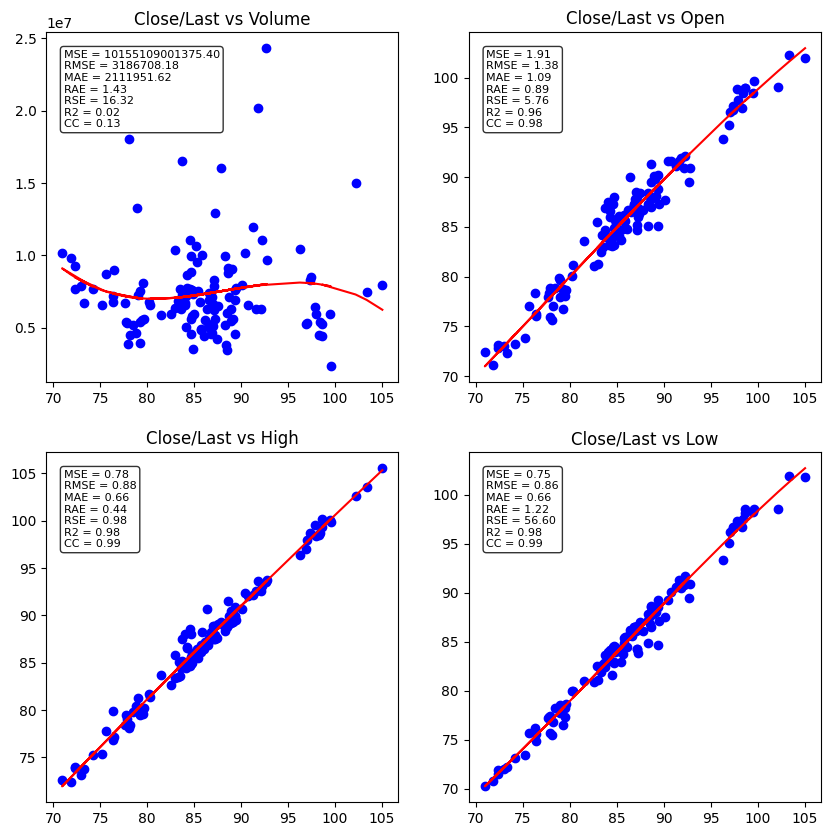

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

dic_tercer_grado = collections.defaultdict(lambda: collections.defaultdict(float))

# Aplicar la función de regresión comparando el volumen con todos los demás atributos y mostrar los errores
for i, col in enumerate(df.columns[2:]):
    # Regresión
    X, y_ajuste = RegresionPolinomial(df['Close/Last'], df[col], 3)
    # Cálculo de errores
    y_true = np.array(df[col]).reshape(-1, 1)
    mse, rmse, mae, rae, rse, r2, cc = AllMetrics(y_true, y_ajuste)
    
    # Agregar resultados al diccionario
    dic_tercer_grado[col]['mse'] = mse
    dic_tercer_grado[col]['rmse'] = rmse
    dic_tercer_grado[col]['mae'] = mae
    dic_tercer_grado[col]['rae'] = rae
    dic_tercer_grado[col]['rse'] = rse
    dic_tercer_grado[col]['r2'] = r2
    dic_tercer_grado[col]['cc'] = cc
    
    # Gráfica
    ax = axs[i//2, i%2]
    ax.scatter(df['Close/Last'], df[col], color='blue')
    ax.plot(X, y_ajuste, color='red')
    ax.set_title(f'Close/Last vs {col}')
    # Agregar el valor del error como texto en la gráfica correspondiente
    ax.text(0.05, 0.95, f'MSE = {mse:.2f}\nRMSE = {rmse:.2f}\nMAE = {mae:.2f}\nRAE = {rae:.2f}\nRSE = {rse:.2f}\nR2 = {r2:.2f}\nCC = {cc:.2f}',
            transform=ax.transAxes, fontsize=8, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

#### Comparación de errores entre las diversas regresiones por métrica y columna

Columna Close/Last vs Volume

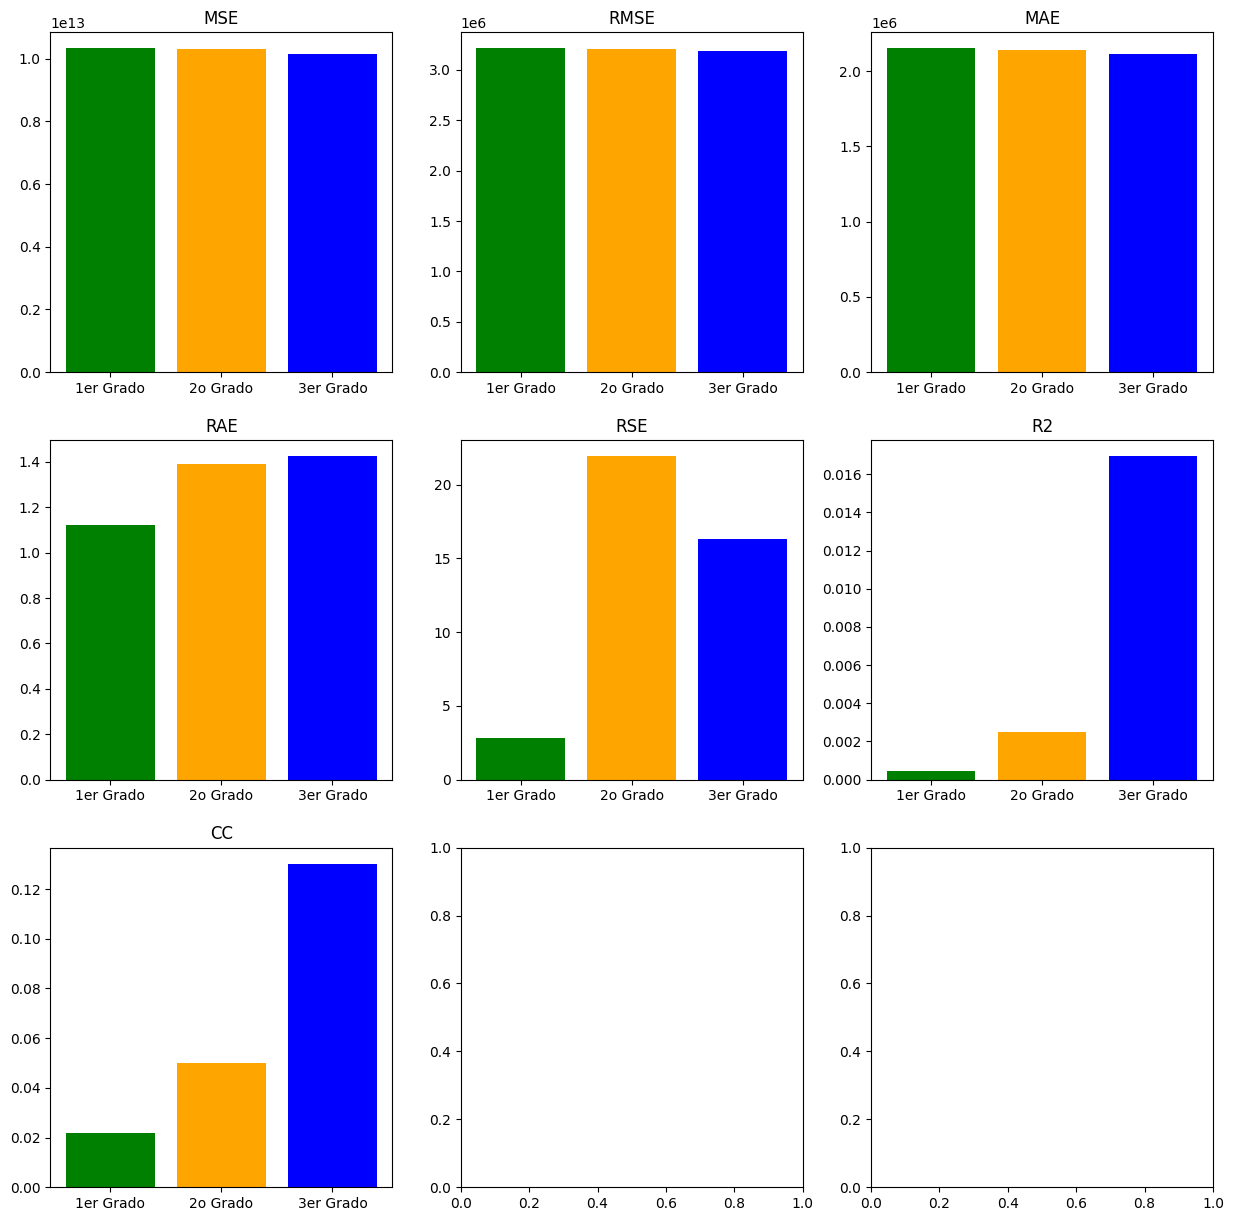

In [28]:
fig, ax = plt.subplots(3,3, figsize=(15,15))

mse_volume = (dic_primer_grado['Volume']['mse'], dic_segundo_grado['Volume']['mse'], dic_tercer_grado['Volume']['mse'])
rmse_volume = (dic_primer_grado['Volume']['rmse'], dic_segundo_grado['Volume']['rmse'], dic_tercer_grado['Volume']['rmse'])
mae_volume = (dic_primer_grado['Volume']['mae'], dic_segundo_grado['Volume']['mae'], dic_tercer_grado['Volume']['mae'])
rae_volume = (dic_primer_grado['Volume']['rae'], dic_segundo_grado['Volume']['rae'], dic_tercer_grado['Volume']['rae'])
rse_volume = (dic_primer_grado['Volume']['rse'], dic_segundo_grado['Volume']['rse'], dic_tercer_grado['Volume']['rse'])
r2_volume = (dic_primer_grado['Volume']['r2'], dic_segundo_grado['Volume']['r2'], dic_tercer_grado['Volume']['r2'])
cc_volume = (dic_primer_grado['Volume']['cc'], dic_segundo_grado['Volume']['cc'], dic_tercer_grado['Volume']['cc'])
volume_array = np.array([mse_volume, rmse_volume, mae_volume, rae_volume, rse_volume, r2_volume, cc_volume])

metrics = ['MSE', 'RMSE', 'MAE', 'RAE', 'RSE', 'R2', 'CC']
for n in range(7):
    ax[n//3, n%3].bar(['1er Grado', '2o Grado', '3er Grado'], volume_array[n], color=['green', 'orange', 'blue'])
    ax[n//3, n%3].set_title(metrics[n])

Columna Close/Last vs Open

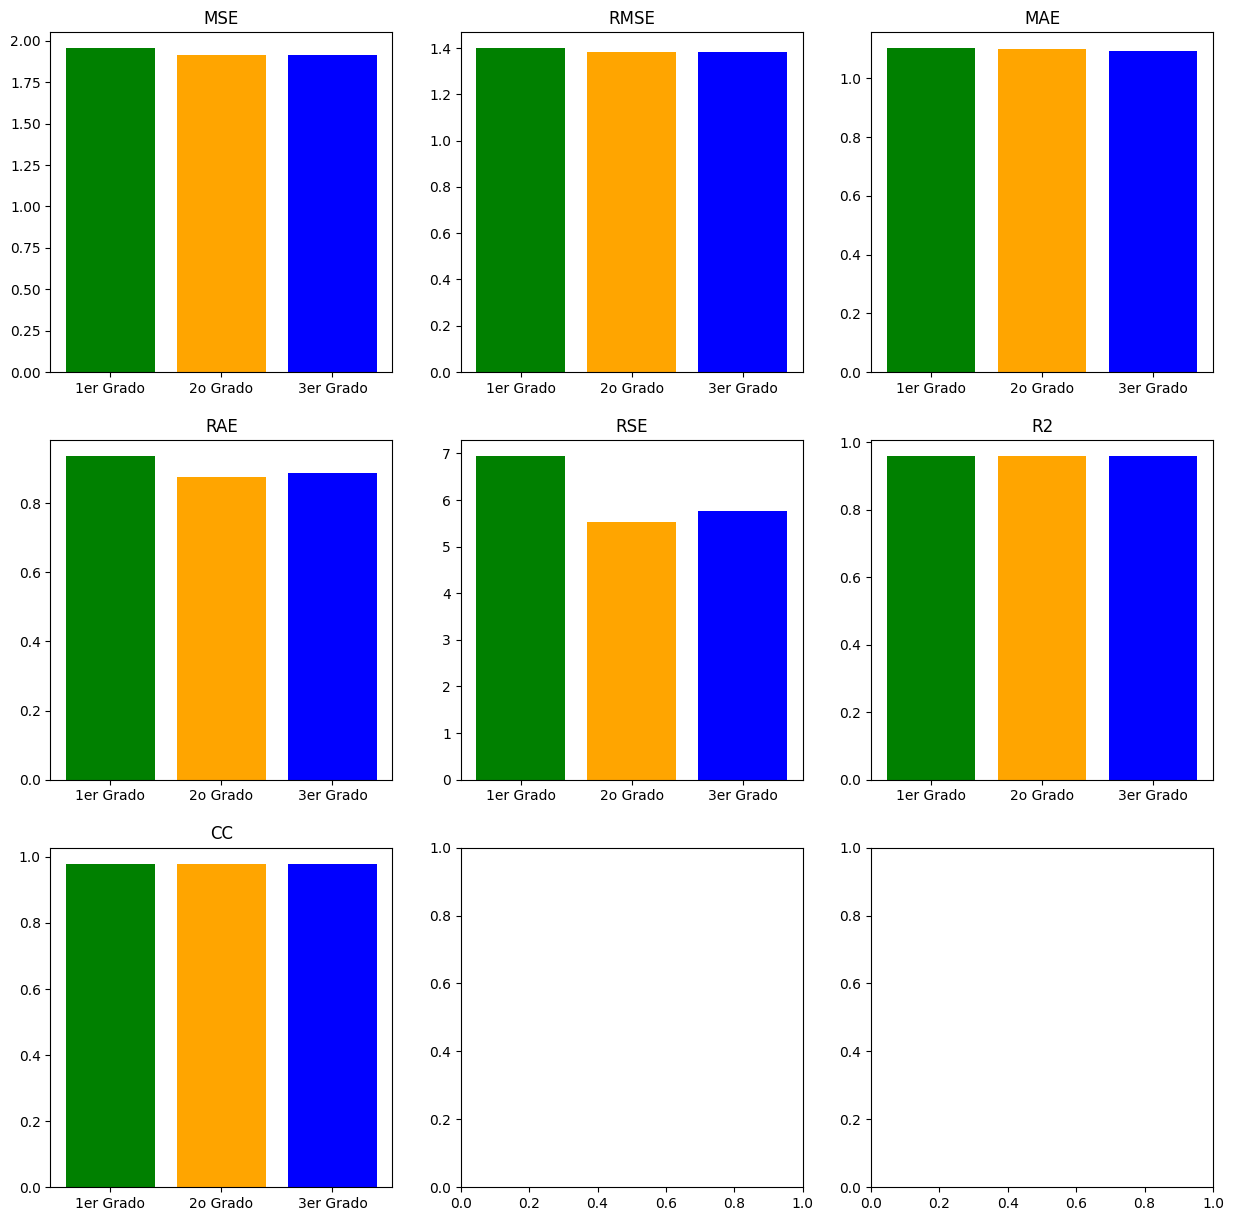

In [29]:
fig, ax = plt.subplots(3,3, figsize=(15,15))

mse_Open = (dic_primer_grado['Open']['mse'], dic_segundo_grado['Open']['mse'], dic_tercer_grado['Open']['mse'])
rmse_Open = (dic_primer_grado['Open']['rmse'], dic_segundo_grado['Open']['rmse'], dic_tercer_grado['Open']['rmse'])
mae_Open = (dic_primer_grado['Open']['mae'], dic_segundo_grado['Open']['mae'], dic_tercer_grado['Open']['mae'])
rae_Open = (dic_primer_grado['Open']['rae'], dic_segundo_grado['Open']['rae'], dic_tercer_grado['Open']['rae'])
rse_Open = (dic_primer_grado['Open']['rse'], dic_segundo_grado['Open']['rse'], dic_tercer_grado['Open']['rse'])
r2_Open = (dic_primer_grado['Open']['r2'], dic_segundo_grado['Open']['r2'], dic_tercer_grado['Open']['r2'])
cc_Open = (dic_primer_grado['Open']['cc'], dic_segundo_grado['Open']['cc'], dic_tercer_grado['Open']['cc'])
Open_array = np.array([mse_Open, rmse_Open, mae_Open, rae_Open, rse_Open, r2_Open, cc_Open])

metrics = ['MSE', 'RMSE', 'MAE', 'RAE', 'RSE', 'R2', 'CC']
for n in range(7):
    ax[n//3, n%3].bar(['1er Grado', '2o Grado', '3er Grado'], Open_array[n], color=['green', 'orange', 'blue'])
    ax[n//3, n%3].set_title(metrics[n])

Columna Close/Last vs High

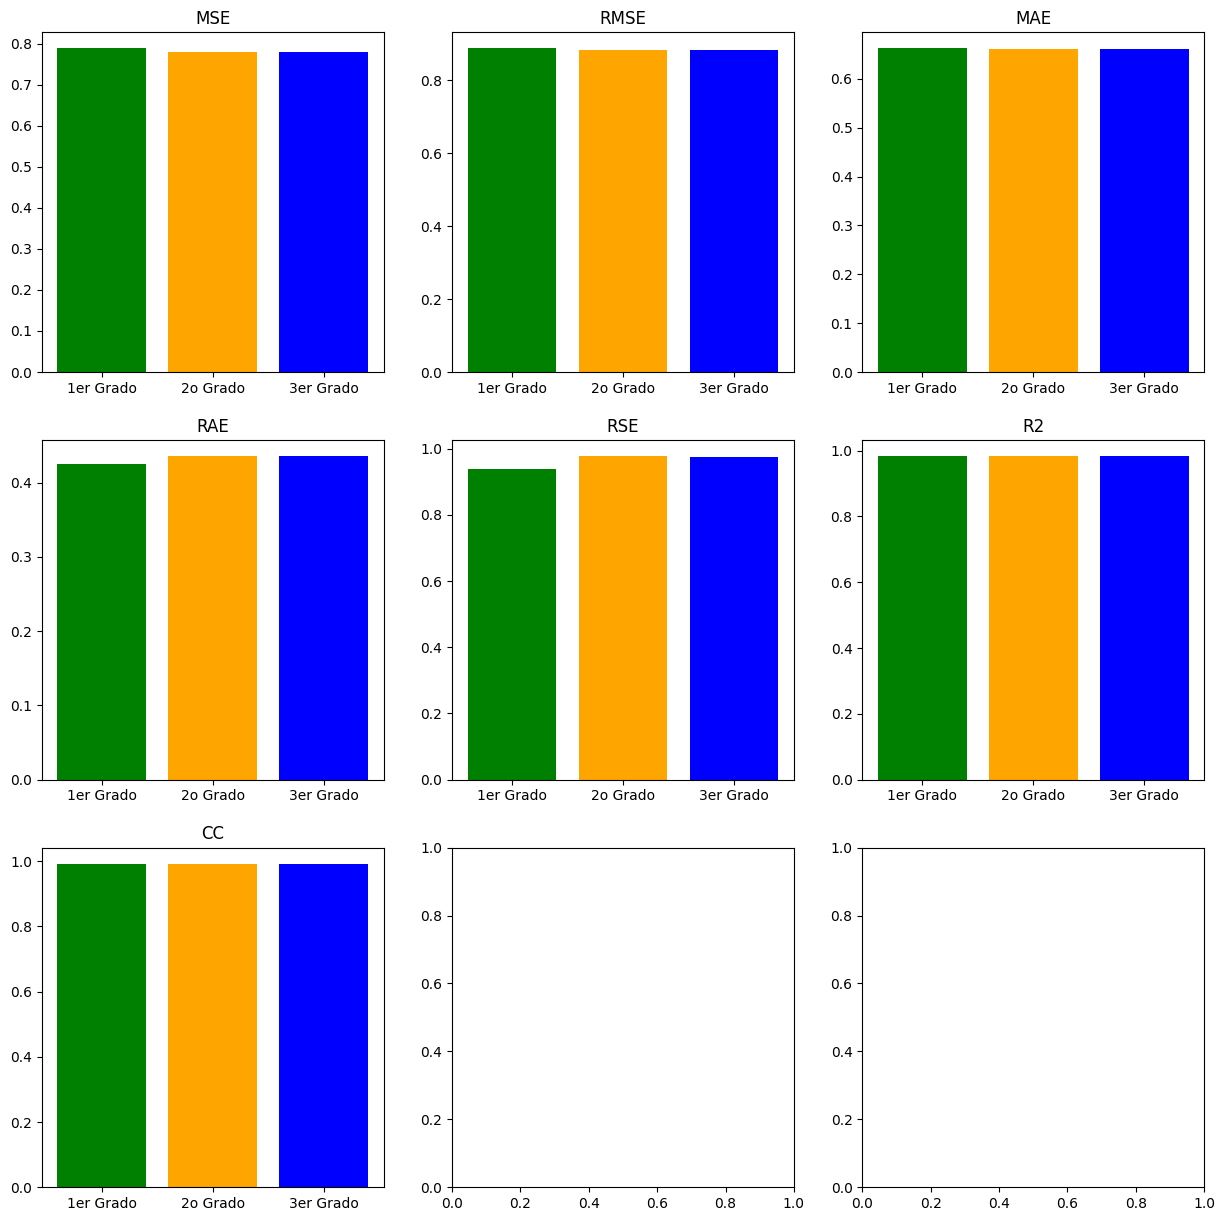

In [30]:
fig, ax = plt.subplots(3,3, figsize=(15,15))

mse_High = (dic_primer_grado['High']['mse'], dic_segundo_grado['High']['mse'], dic_tercer_grado['High']['mse'])
rmse_High = (dic_primer_grado['High']['rmse'], dic_segundo_grado['High']['rmse'], dic_tercer_grado['High']['rmse'])
mae_High = (dic_primer_grado['High']['mae'], dic_segundo_grado['High']['mae'], dic_tercer_grado['High']['mae'])
rae_High = (dic_primer_grado['High']['rae'], dic_segundo_grado['High']['rae'], dic_tercer_grado['High']['rae'])
rse_High = (dic_primer_grado['High']['rse'], dic_segundo_grado['High']['rse'], dic_tercer_grado['High']['rse'])
r2_High = (dic_primer_grado['High']['r2'], dic_segundo_grado['High']['r2'], dic_tercer_grado['High']['r2'])
cc_High = (dic_primer_grado['High']['cc'], dic_segundo_grado['High']['cc'], dic_tercer_grado['High']['cc'])
High_array = np.array([mse_High, rmse_High, mae_High, rae_High, rse_High, r2_High, cc_High])

metrics = ['MSE', 'RMSE', 'MAE', 'RAE', 'RSE', 'R2', 'CC']
for n in range(7):
    ax[n//3, n%3].bar(['1er Grado', '2o Grado', '3er Grado'], High_array[n], color=['green', 'orange', 'blue'])
    ax[n//3, n%3].set_title(metrics[n])

Columna Close/Last vs Low

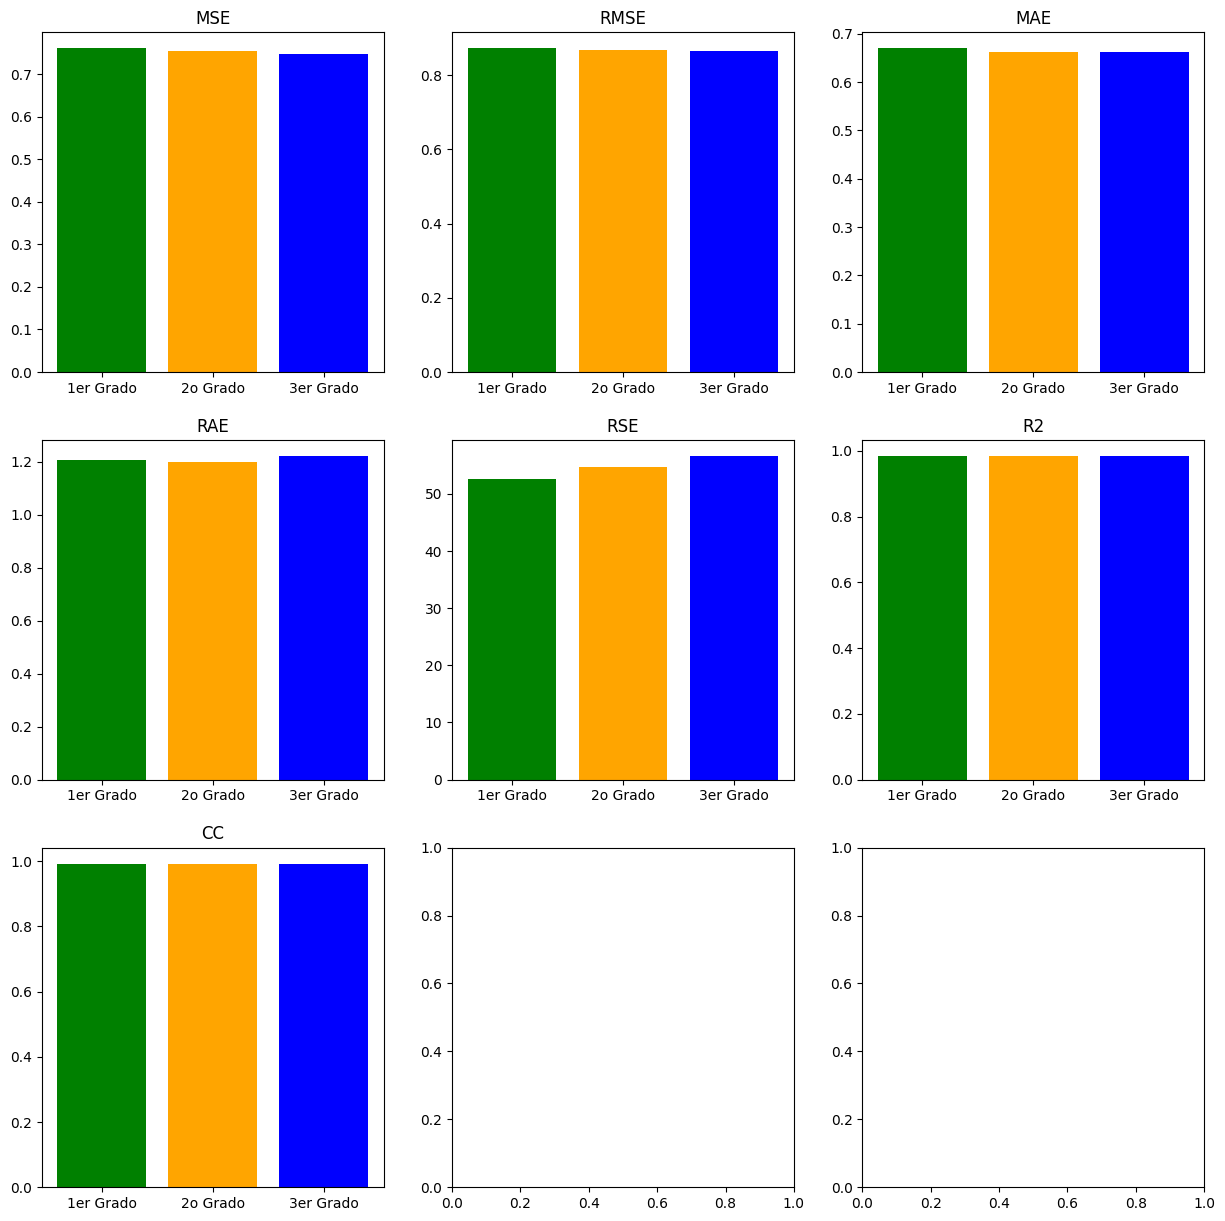

In [31]:
fig, ax = plt.subplots(3,3, figsize=(15,15))

mse_Low = (dic_primer_grado['Low']['mse'], dic_segundo_grado['Low']['mse'], dic_tercer_grado['Low']['mse'])
rmse_Low = (dic_primer_grado['Low']['rmse'], dic_segundo_grado['Low']['rmse'], dic_tercer_grado['Low']['rmse'])
mae_Low = (dic_primer_grado['Low']['mae'], dic_segundo_grado['Low']['mae'], dic_tercer_grado['Low']['mae'])
rae_Low = (dic_primer_grado['Low']['rae'], dic_segundo_grado['Low']['rae'], dic_tercer_grado['Low']['rae'])
rse_Low = (dic_primer_grado['Low']['rse'], dic_segundo_grado['Low']['rse'], dic_tercer_grado['Low']['rse'])
r2_Low = (dic_primer_grado['Low']['r2'], dic_segundo_grado['Low']['r2'], dic_tercer_grado['Low']['r2'])
cc_Low = (dic_primer_grado['Low']['cc'], dic_segundo_grado['Low']['cc'], dic_tercer_grado['Low']['cc'])
Low_array = np.array([mse_Low, rmse_Low, mae_Low, rae_Low, rse_Low, r2_Low, cc_Low])

metrics = ['MSE', 'RMSE', 'MAE', 'RAE', 'RSE', 'R2', 'CC']
for n in range(7):
    ax[n//3, n%3].bar(['1er Grado', '2o Grado', '3er Grado'], Low_array[n], color=['green', 'orange', 'blue'])
    ax[n//3, n%3].set_title(metrics[n])